In [26]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import scipy
from scipy import linalg
from scipy.linalg import pinv

from sklearn import preprocessing, datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA, NMF, IncrementalPCA, FactorAnalysis, SparsePCA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection

import warnings
import os

import sys
import time

**<font color=black size=5>Load Data</font>**

In [27]:
sklearn_data = datasets.load_breast_cancer()
# sklearn_data = datasets.load_digits()

x, y = sklearn_data.data, sklearn_data.target
x = preprocessing.scale(x) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1997)

# print(x)
# print(sklearn_data.data.shape)
# print(x.shape,y.shape)

**<font color=black size=5>PCA</font>**

In [28]:
def plot_2d(x,title,data):
    for X_transformed, title, data in [(x, title, data)]:
        fig = plt.figure()
        plt.scatter(x[:, 0], x[:, 1], c=y,
                   cmap=plt.cm.Set1, edgecolor='k', s=40)
        plt.title(title + " of "+ data +" dataset")
    plt.show()

In [29]:
def plot_3d(x,title,data):
    for X_transformed, title, data in [(x, title, data)]:      
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y,
                   cmap=plt.cm.Set1, edgecolor='k', s=40)
        plt.title(title + " of "+ data +" dataset")
    plt.show()

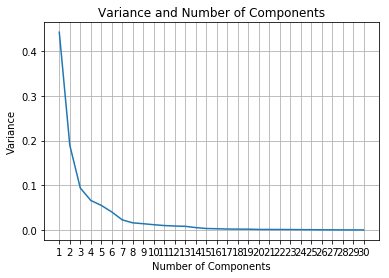

In [30]:
def PCA_Analysis(pca):
    plt.figure()
    plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
    plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1))
    plt.xlabel('Number of Components')
    plt.ylabel('Variance')
    plt.title('Variance and Number of Components')
    plt.grid()
    plt.show()

pca = PCA()
pca.fit(x)
PCA_Analysis(pca)


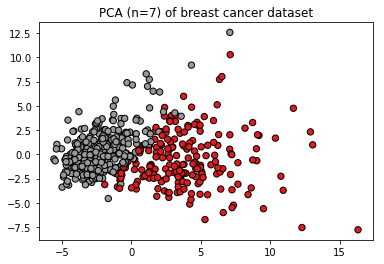

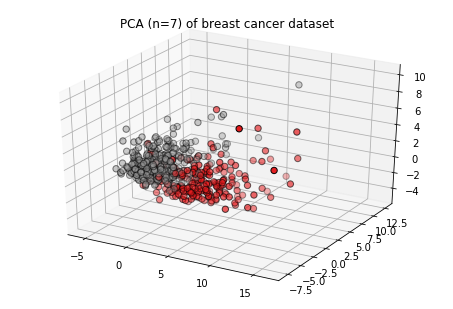

In [203]:
X_pca = PCA(n_components=7).fit_transform(x)
plot_2d(X_pca,'PCA (n=7)', 'breast cancer')
plot_3d(X_pca,'PCA (n=7)', 'breast cancer')

best n_components by FactorAnalysis CV = 25


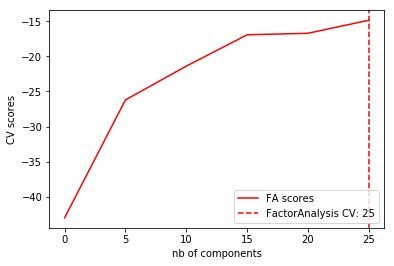

In [197]:
n_features = x.shape[1]
n_components = np.arange(0, n_features, 5)  # options for n_components
X = x

def compute_scores(X):
    fa = PCA() 
    fa_scores = []
    for n in n_components:
        fa.n_components = n
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return fa_scores

for X, title in [(X, '')]:
    fa_scores = compute_scores(X)
    n_components_fa = n_components[np.argmax(fa_scores)]

    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)

    plt.figure()
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')

    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

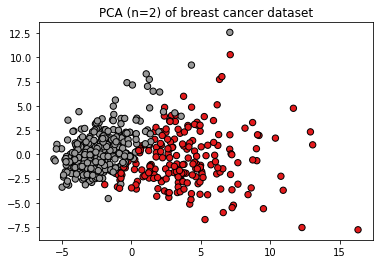

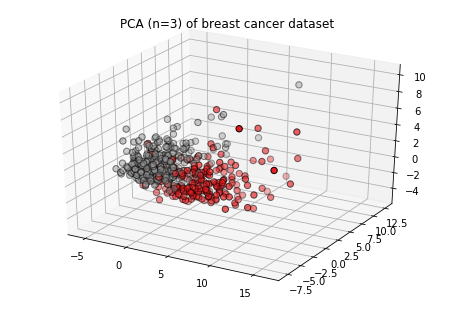

In [198]:
X_pca = PCA(n_components=2).fit_transform(x)
plot_2d(X_pca,'PCA (n=2)', 'breast cancer')

X_pca = PCA(n_components=3).fit_transform(x)
plot_3d(X_pca,'PCA (n=3)', 'breast cancer')

**<font color=black size=5>ICA</font>**

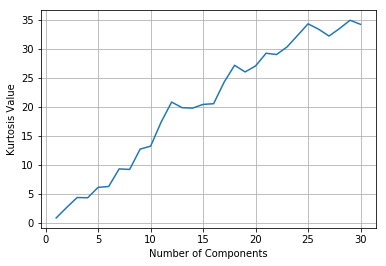

In [177]:
def kurtosis_analysis(X):
    arr = []
    for i in range(1,31):
        dim_red = FastICA(n_components = i).fit_transform(X)
        kurt = scipy.stats.kurtosis(dim_red)
        arr.append(np.mean(kurt))
    arr = np.array(arr)
    plt.plot(np.arange(1,31),arr)
    plt.xlabel('Number of Components')
    plt.ylabel('Kurtosis Value')
    plt.grid()
    plt.show()
kurtosis_analysis(x)

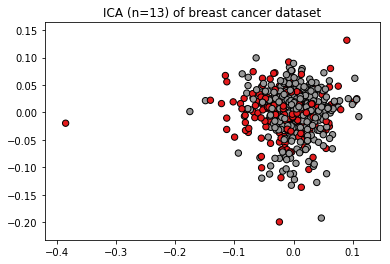

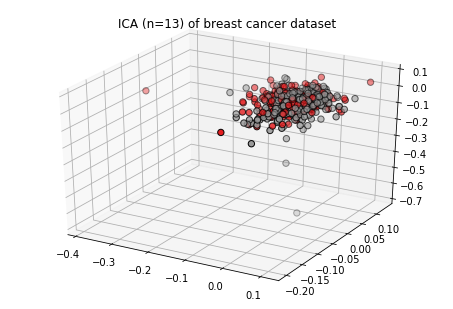

In [184]:
X_pca = FastICA(n_components = 13, max_iter=10000).fit_transform(x)
plot_2d(X_pca,'ICA (n=13)', 'breast cancer')
plot_3d(X_pca,'ICA (n=13)', 'breast cancer')

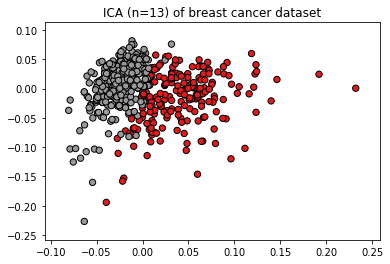

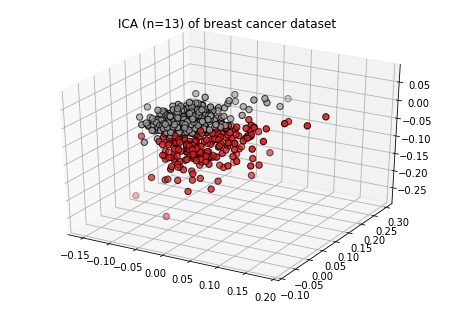

In [193]:
X_pca = FastICA(n_components = 2).fit_transform(x)
plot_2d(X_pca,'ICA (n=13)', 'breast cancer')

X_pca = FastICA(n_components = 3).fit_transform(x)
plot_3d(X_pca,'ICA (n=13)', 'breast cancer')

**<font color=black size=5>Randomized Projections</font>**

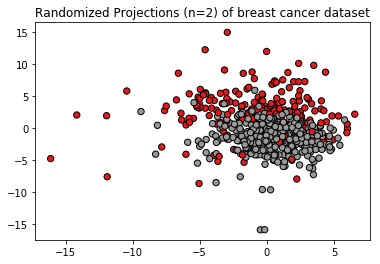

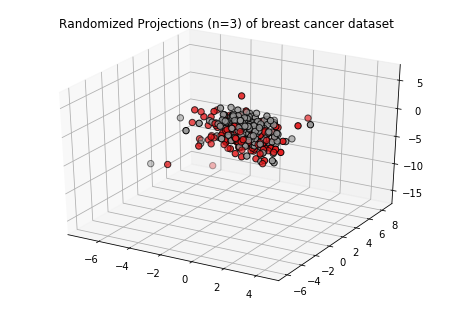

In [7]:
X_pca = GaussianRandomProjection(n_components = 2).fit_transform(x)
plot_2d(X_pca,'Randomized Projections (n=2)', 'breast cancer')

X_pca = GaussianRandomProjection(n_components = 3).fit_transform(x)
plot_3d(X_pca,'Randomized Projections (n=3)', 'breast cancer')

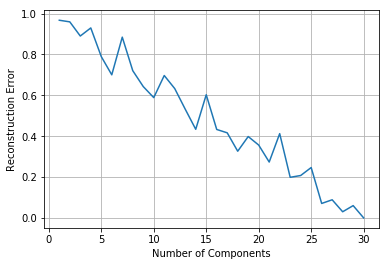

In [246]:
def RP_analysis(X):
    arr = []
    for i in range(1,31):
        rp = GaussianRandomProjection(n_components=i)
        X_rp = rp.fit(X)
        p = pinv(X_rp.components_)
        w = X_rp.components_
        reconstructed = ((p@w)@(X.T)).T 
        arr.append(mean_squared_error(X,reconstructed))

    arr = np.array(arr)
    plt.plot(np.arange(1,31),arr)
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.grid()
    plt.show()
RP_analysis(x)

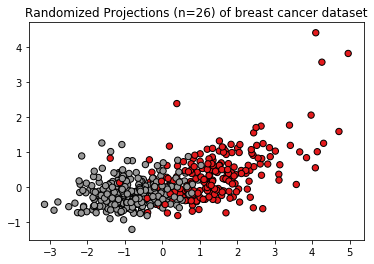

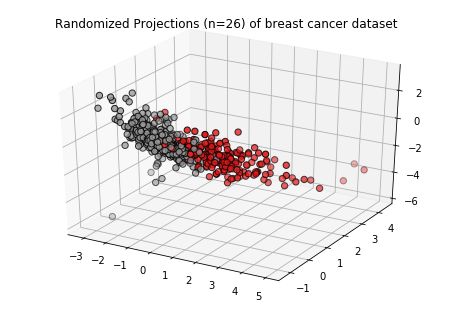

In [279]:
X_pca = GaussianRandomProjection(n_components = 26).fit_transform(x)
plot_2d(X_pca,'Randomized Projections (n=26)', 'breast cancer')
plot_3d(X_pca,'Randomized Projections (n=26)', 'breast cancer')

**<font color=black size=5>Factor Analysis</font>**

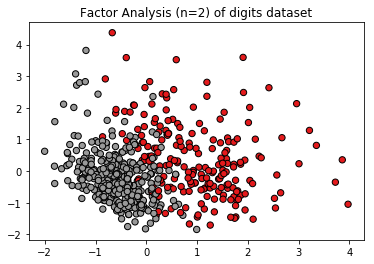

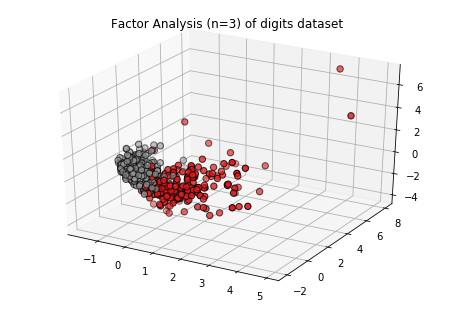

In [276]:
X = FactorAnalysis(n_components = 2).fit_transform(x)
plot_2d(X,'Factor Analysis (n=2)', 'digits')
X = FactorAnalysis(n_components = 3).fit_transform(x)
plot_3d(X,'Factor Analysis (n=3)', 'digits')

best n_components by FactorAnalysis CV = 15


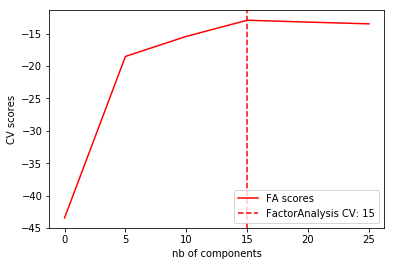

In [281]:
n_features = x.shape[1]
n_components = np.arange(0, n_features, 5)  # options for n_components
X = x

def compute_scores(X):
    fa = FactorAnalysis() 
    fa_scores = []
    for n in n_components:
        fa.n_components = n
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return fa_scores

for X, title in [(X, '')]:
    fa_scores = compute_scores(X)
    n_components_fa = n_components[np.argmax(fa_scores)]

    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)

    plt.figure()
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')

    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

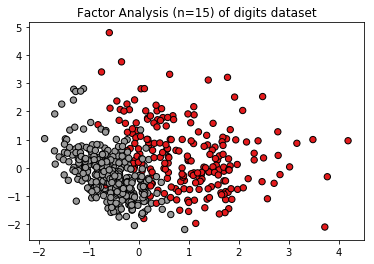

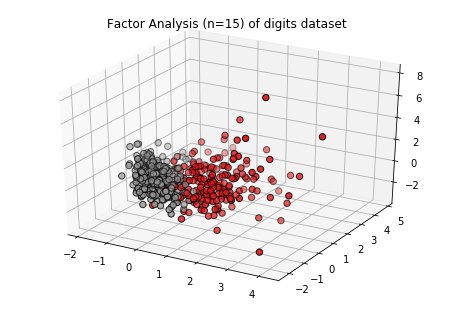

In [285]:
X = FactorAnalysis(n_components = 15).fit_transform(x)
plot_2d(X,'Factor Analysis (n=15)', 'digits')
plot_3d(X,'Factor Analysis (n=15)', 'digits')

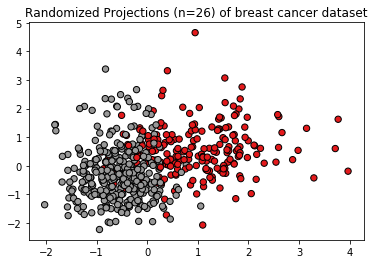

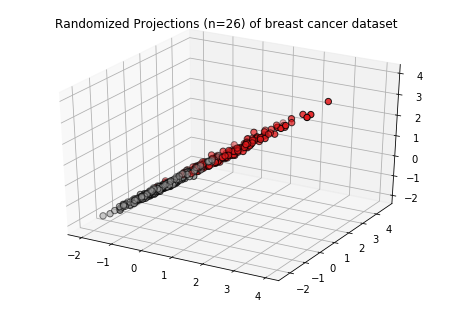

In [288]:
plot_2d(x,'Randomized Projections (n=26)', 'breast cancer')
plot_3d(x,'Randomized Projections (n=26)', 'breast cancer')